# Flongle Experiments


In [1]:
from read_clustering.variant_call import VariantCalls
threshold = 0.5
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches


/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/umap/__init__.py:9: UserWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn("Tensorflow not installed; ParametricUMAP will be unavailable")
/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [55]:
twoprimeo_pos = [ 648,  649,  662,  804,  806,  816,  866,  875,  897,  907, 1132,
       1436, 1448, 1449, 1887, 2196, 2219, 2255, 2279, 2280, 2287, 2336,
       2346, 2416, 2420, 2618, 2639, 2723, 2728, 2790, 2792, 2814, 2920,
       2921, 2945, 2947, 2958, 27,   99,  413,  419,  435,  540,  561,  577,  618,  795,  973,
       1006, 1125, 1268, 1270, 1427, 1571, 1638]

In [56]:
pseduo_u_pos = [ 775,  959,  965,  985,  989, 1003, 1041, 1051, 1055, 1109, 1123,
       2128, 2132, 2190, 2257, 2259, 2263, 2265, 2313, 2339, 2348, 2350,
       2415, 2734, 2825, 2864, 2879, 2922, 2943, 2974, 105,  119,  210,  301,  465,  631,  758,  765,  998, 1180, 1186,
       1289, 1414]

In [63]:
ivt_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/small_5mer/depletion/train_500_test_500_prob_0.7_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_small_model_5mer_use_median_true_min_sd_0/all_variant_calls/template_hmm30/canonical_ivt.csv"
cbf5_glu_psu_depletion_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/small_5mer/depletion/train_500_test_500_prob_0.7_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_small_model_5mer_use_median_true_min_sd_0/all_variant_calls/template_hmm30/run_cbf5_glu.csv"
nop58_glu_2o_depletion_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/small_5mer/depletion/train_500_test_500_prob_0.7_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_small_model_5mer_use_median_true_min_sd_0/all_variant_calls/template_hmm30/run_nop_glu.csv"       
native_cbf5_gal_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/small_5mer/depletion/train_500_test_500_prob_0.7_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_small_model_5mer_use_median_true_min_sd_0/all_variant_calls/template_hmm30/native_cbf5_gal.csv"

all_file_paths = [ivt_path, cbf5_glu_psu_depletion_path, nop58_glu_2o_depletion_path, native_cbf5_gal_path]
all_labels = ["ivt", "cbf5_glu_psu_depletion", "nop58_glu_2o_depletion", "cbf5_gal"]



# YWD448a: loss psu @ 18-759; 25-775(776)
YWD448a = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_pass_csvs/mutant448_YPD.csv"
# YWD451a: loss psu @ 18-1289
YWD451a = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_pass_csvs/mutant451_YPD.csv"
# YWD452a: loss of 2'Ome @ 18-436
YWD452a = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_pass_csvs/mutant452_YPD.csv"
# WT_CY: cycloheximide
WT_CY = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_pass_csvs/WT_CY.csv"
# WT_CY: Potassium Acetate
WT_KOAC = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_pass_csvs/WT_KOAC.csv"
# actual wildtype
WT_YPD = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_pass_csvs/WT_YPD.csv"

# YWD448a = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_all_csvs/mutant448_YPD.csv"
# # YWD451a: loss psu @ 18-1289
# YWD451a = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_all_csvs/mutant451_YPD.csv"
# # YWD452a: loss of 2'Ome @ 18-436
# YWD452a = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_all_csvs/mutant452_YPD.csv"
# # WT_CY: cycloheximide
# WT_CY = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_all_csvs/WT_CY.csv"
# # WT_CY: Potassium Acetate
# WT_KOAC = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_all_csvs/WT_KOAC.csv"
# # actual wildtype
# WT_YPD = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_all_csvs/WT_YPD.csv"


file_paths = [YWD448a, YWD451a, YWD452a, WT_CY, WT_KOAC, WT_YPD]
labels = ["YWD448a", "YWD451a", "YWD452a", "WT_CY", "WT_KOAC", "WT_YPD"]
all_file_paths.extend(file_paths)
all_labels.extend(labels)

In [64]:
# vc = VariantCalls(file_paths, labels)
vc = VariantCalls(all_file_paths, all_labels)


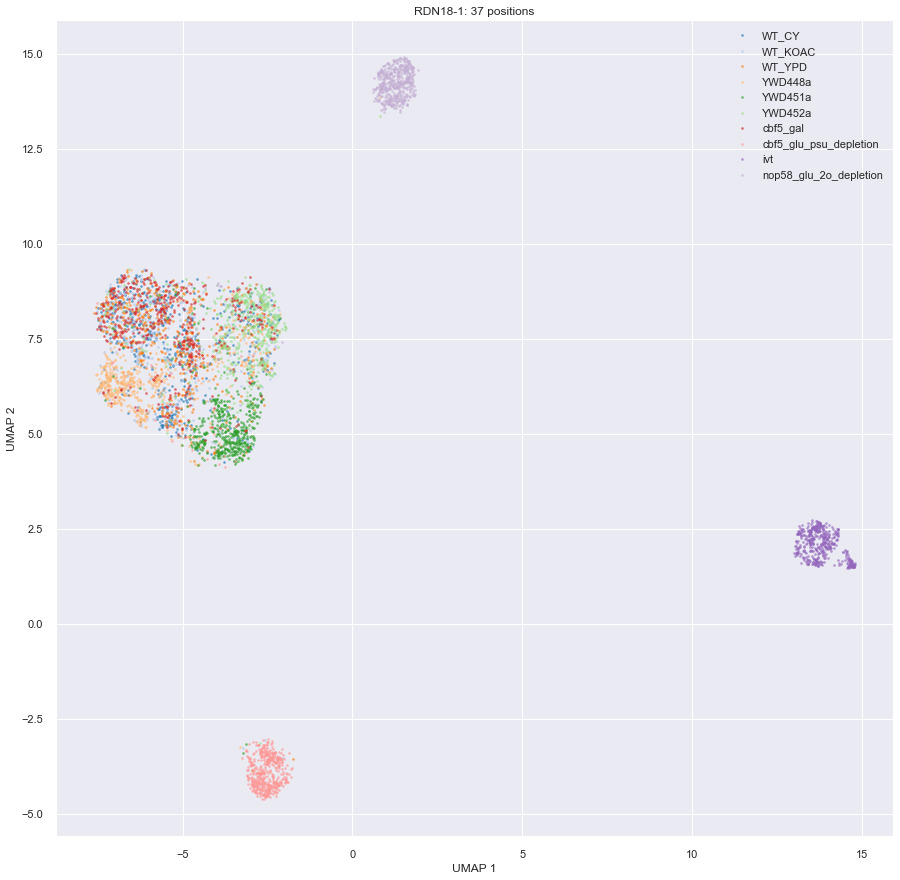

In [65]:
contig = 'RDN18-1'
n_components = 2
n = 500
save_fig_path = None
# save_fig_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/figures/flongle/YWD448a/native_vs_YWD448a_18S.png"
vc.plot_UMAP_by_label(contig, vc.get_contig_positions(contig), n_components=n_components, figure_path=save_fig_path, n=n)

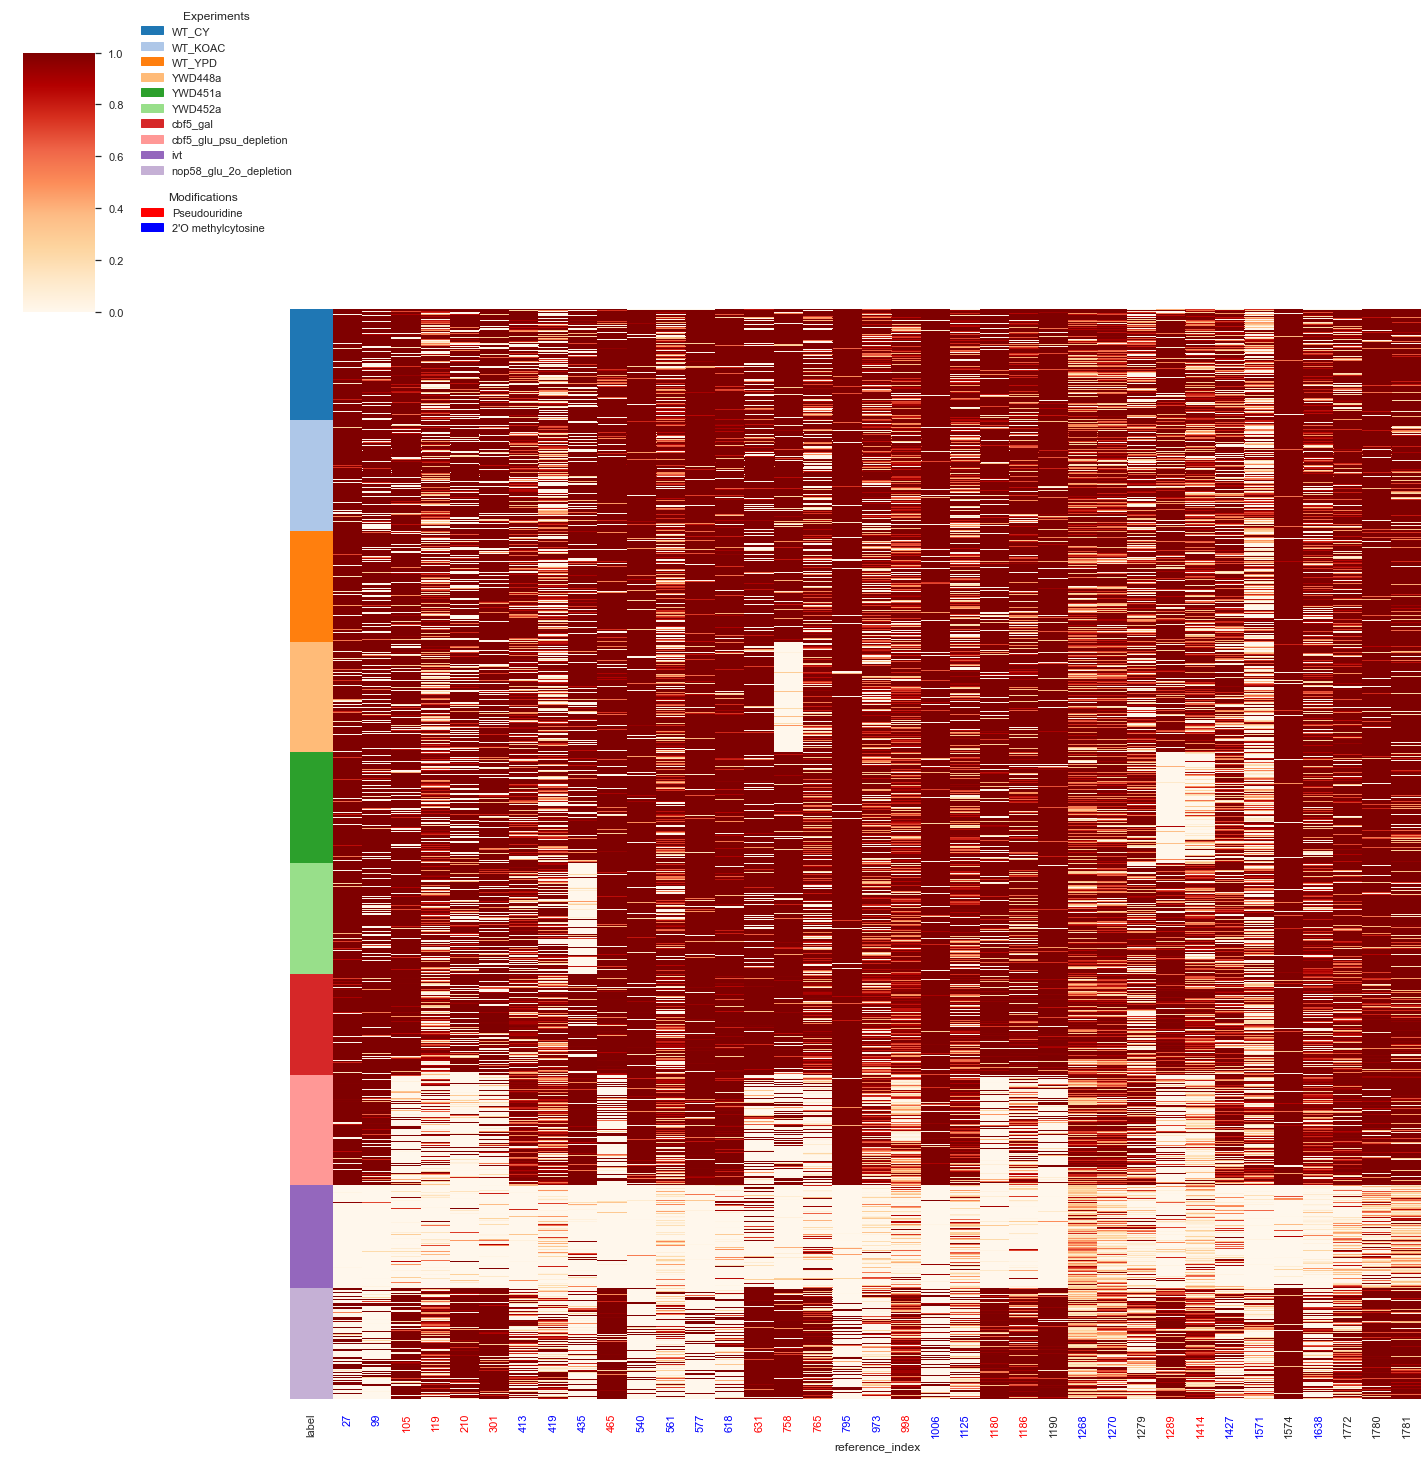

In [66]:
n = 500
figure_path = None
metric = 'euclidean'
method = 'average'
contig = 'RDN18-1'
# figure_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/figures/flongle/YWD448a/native_vs_YWD448a_18S.png"

vc.plot_heatmap_dendrogram(contig, vc.get_contig_positions(contig), n=n, figure_path=figure_path,
                           metric=metric,
                           method=method, 
                           col_cluster=False,
                           row_cluster=False,
                           twoprimeo_pos=twoprimeo_pos,
                           pseduo_u_pos=pseduo_u_pos)


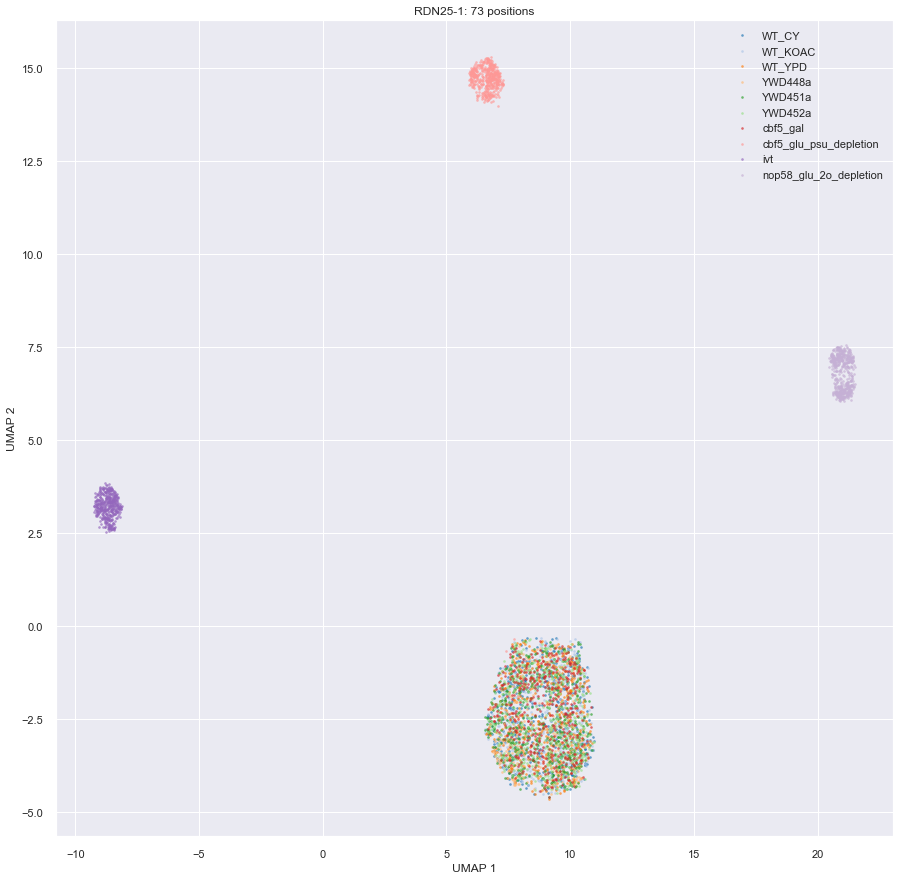

In [67]:
contig = 'RDN25-1'
n_components = 2
n = 500
save_fig_path=None
vc.plot_UMAP_by_label(contig, vc.get_contig_positions(contig), n_components=n_components, figure_path=save_fig_path, n=n)

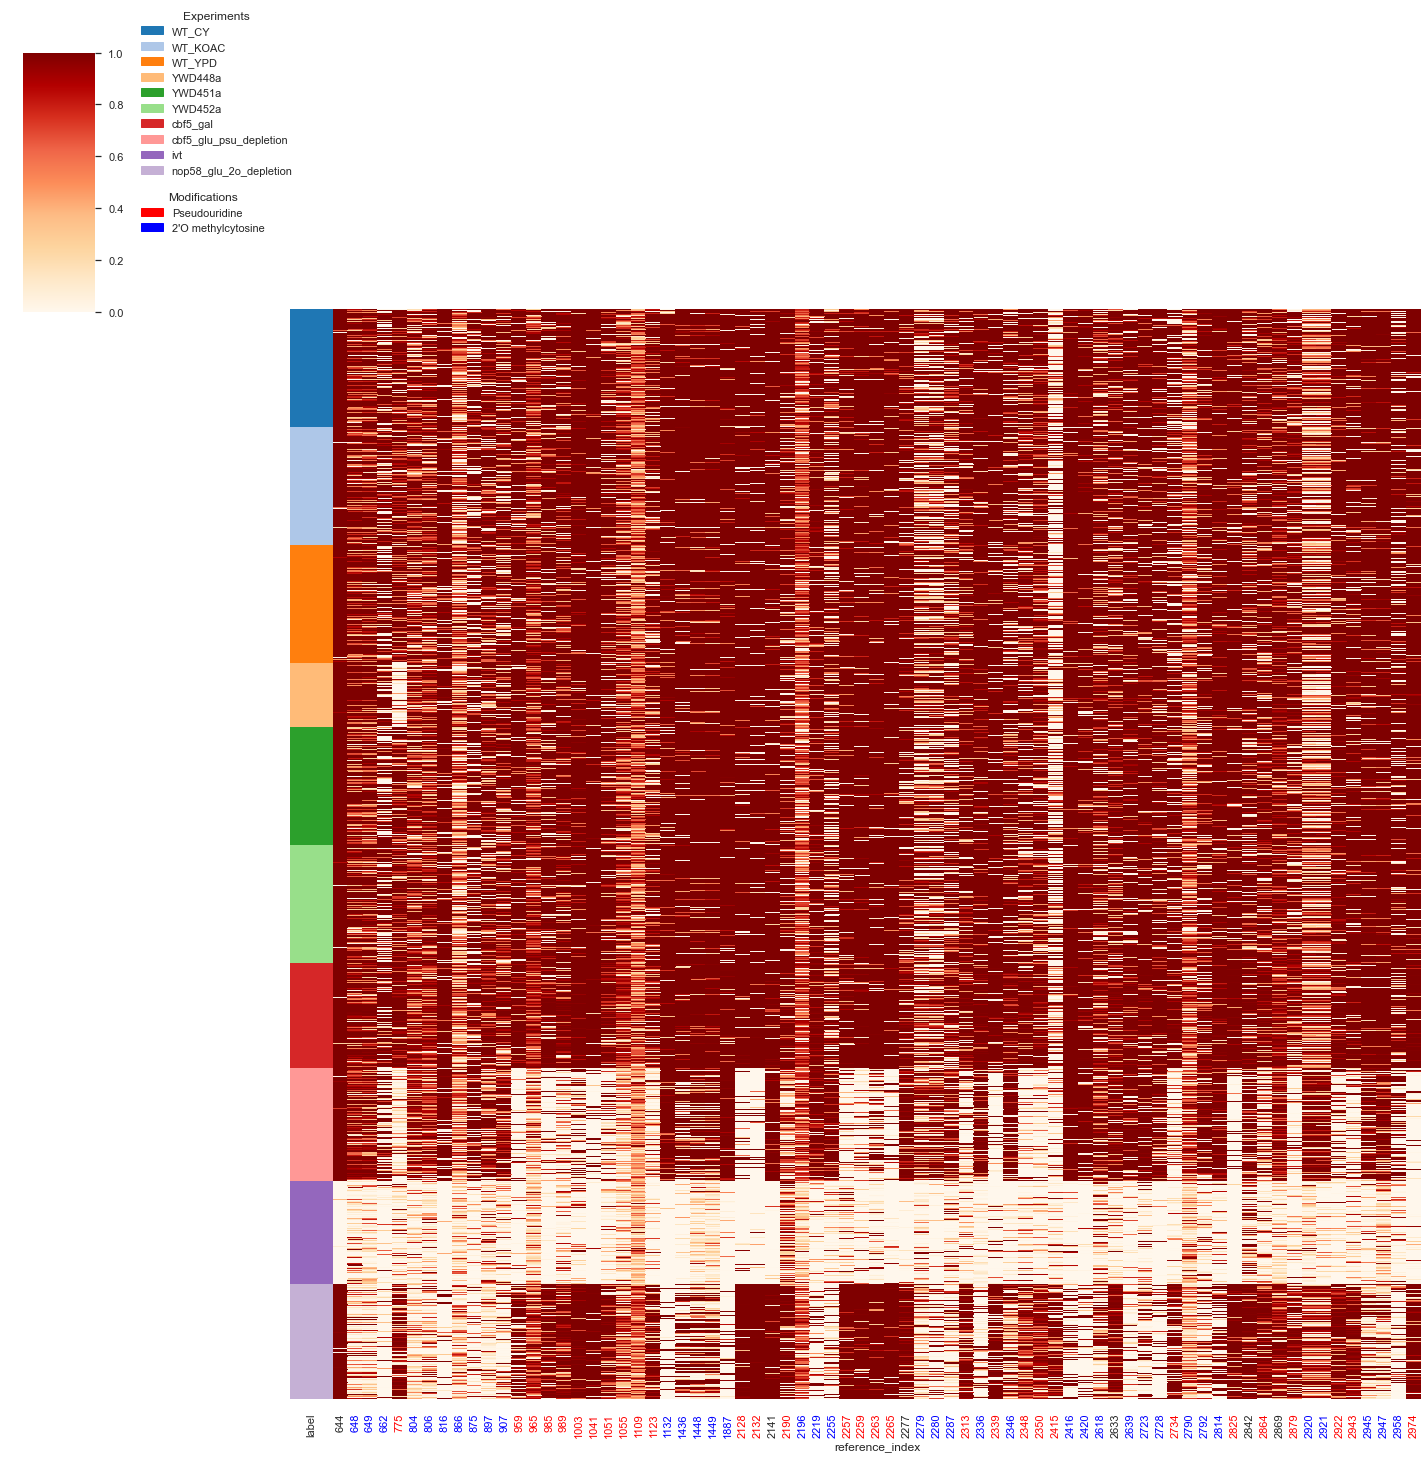

In [68]:
n = 500
figure_path = None
# figure_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/figures/flongle/YWD448a/native_vs_YWD448a_25S.png"
metric = 'euclidean'
method = 'average'
contig = 'RDN25-1'

vc.plot_heatmap_dendrogram(contig, vc.get_contig_positions(contig), n=n, figure_path=figure_path,
                           metric=metric,
                           method=method, 
                           col_cluster=False,
                           row_cluster=False,
                           twoprimeo_pos=twoprimeo_pos,
                           pseduo_u_pos=pseduo_u_pos)


In [11]:
contig = 'RDN25-1'
contig = 'RDN18-1'

positions = vc.get_contig_positions(contig)
data = vc.data[(vc.data["contig"] == contig) & (vc.data['reference_index'].isin(positions))]
df = data.pivot(index=['read_id', 'label'], columns=['reference_index'], values='prob2')
X = df.dropna()
print(np.sum(pd.DataFrame(X.index.get_level_values(1))["label"] == "YWD448a"))
data = vc.data[(vc.data["contig"] == contig)]
df = data.pivot(index=['read_id', 'label'], columns=['reference_index'], values='prob2')
X = df.dropna()
print(np.sum(pd.DataFrame(X.index.get_level_values(1))["label"] == "YWD448a"))

493
493


In [12]:
len(set(vc.data[(vc.data["contig"] == contig)]["read_id"]))


26072